## Albert Kabore

GitHub Repository: https://github.com/albertokabore/Albert_SQL-Project-Assignment-E-Commerce-Amazon-Sales-Analysis

## Introduction: SQL Project Assignment – E-Commerce Amazon Sales Analysis

This project uses an e-commerce dataset sourced from Kaggle, containing transactional data from Amazon. The dataset provides comprehensive insights into sales trends, product performance, order fulfillment status, and customer behavior. An in-depth SQL-based analysis was conducted to uncover key patterns and generate actionable business recommendations.

In [274]:
!pip install pandas matplotlib seaborn sqlite3 numpy pandas

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sqlite3


In [275]:
!pip install pandas openpyxl



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [276]:
!pip install  pandas matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3



In [278]:
import pandas as pd
import sqlite3
# Load the Excel file
df = pd.read_excel("Amazon Sale Report.xlsx")  # Ensure this file is in the same folder

# Connect to SQLite DB (creates file if it doesn't exist)
conn = sqlite3.connect("amazon_sales.db")

# Write the data into a table named 'sales'
df.to_sql("sales", conn, if_exists="replace", index=False)

print(" Excel file imported into SQLite database as 'sales' table.")
conn.close()

 Excel file imported into SQLite database as 'sales' table.


In [279]:
# Inspect first rows of the DataFrame
print(df.head())

   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR

In [280]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   
5      5  404-1490984-4578765 2022-04-30                       Shipped   
6      6  408-5748499-6859555 2022-04-30                       Shipped   
7      7  406-7807733-3785945 2022-04-30  Shipped - Delivered to Buyer   
8      8  407-5443024-5233168 2022-04-30                     Cancelled   
9      9  402-4393761-0311520 2022-04-30                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style                  SKU  \
0   Merchant      Amazon.in           Standard   SET389       SET389-KR-NP-S   
1   Merchant      Amazon.

In [281]:
# Step 1: View missing values
print("🔍 Missing values per column:")
print(df.isnull().sum())

🔍 Missing values per column:
index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


### Initial Descriptive Statistics

In [282]:
print(df.describe())


               index                           Date            Qty  \
count  128975.000000                         128975  128975.000000   
mean    64487.000000  2022-05-12 11:49:27.951928576       0.904431   
min         0.000000            2022-03-31 00:00:00       0.000000   
25%     32243.500000            2022-04-20 00:00:00       1.000000   
50%     64487.000000            2022-05-10 00:00:00       1.000000   
75%     96730.500000            2022-06-04 00:00:00       1.000000   
max    128974.000000            2022-06-29 00:00:00      15.000000   
std     37232.019822                            NaN       0.313354   

              Amount  ship-postal-code  Unnamed: 22  
count  121180.000000     128942.000000      79925.0  
mean      648.561465     463966.236509          0.0  
min         0.000000     110001.000000          0.0  
25%       449.000000     382421.000000          0.0  
50%       605.000000     500033.000000          0.0  
75%       788.000000     600024.000000       

In [283]:
# Step 2: Display original column names
print("Original columns:", df.columns.tolist())

Original columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [284]:
# Step 3: Drop rows with critical missing values
df = df.dropna(subset=["Order ID", "Date", "Qty", "Amount"])


In [285]:
# Step 4: Rename columns for SQL compatibility
df.rename(columns={
    "Order ID": "Order_ID",
    "Date": "Order_Date",
    "Sales Channel ": "Sales_Channel",
    "ship-service-level": "Ship_Service_Level",
    "Courier Status": "Courier_Status",
    "Qty": "Quantity_Ordered",
    "Amount": "Total_Revenue",
    "ship-city": "Ship_City",
    "ship-state": "Ship_State",
    "ship-postal-code": "Ship_Postal_Code",
    "ship-country": "Ship_Country"
}, inplace=True)



In [286]:
# Step 5: Drop unnamed columns (like 'Unnamed: 22' or similar)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]



In [287]:
# Step 6: Convert data types
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors='coerce')
df["Quantity_Ordered"] = pd.to_numeric(df["Quantity_Ordered"], errors='coerce')
df["Total_Revenue"] = pd.to_numeric(df["Total_Revenue"], errors='coerce')



In [288]:
# Step 7: Remove duplicate rows
df.drop_duplicates(inplace=True)



In [289]:
# Step 8: Export cleaned DataFrame to SQLite
conn = sqlite3.connect("amazon_sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)
conn.close()

print(" Data cleaning completed and saved to SQLite as 'sales' table.")

 Data cleaning completed and saved to SQLite as 'sales' table.


In [290]:
# Connect to the SQLite database (local path relative to script)
conn = sqlite3.connect("amazon_sales.db")

# Query 1: Top 10 Products by Revenue
query1 = """
SELECT "Product Name", SUM("Total Revenue") AS Revenue
FROM sales
GROUP BY "Product Name"
ORDER BY Revenue DESC
LIMIT 10;
"""
top_products_df = pd.read_sql_query(query1, conn)

# Query 2: Monthly Revenue Trend
query2 = """
SELECT STRFTIME('%Y-%m', "Order Date") AS Month, 
       SUM("Total Revenue") AS Revenue
FROM sales
GROUP BY Month
ORDER BY Month;
"""
monthly_revenue_df = pd.read_sql_query(query2, conn)

conn.close()



In [291]:


# Confirm column names
print(df.columns.tolist())  # Optional debug step



['index', 'Order_ID', 'Order_Date', 'Status', 'Fulfilment', 'Sales_Channel', 'Ship_Service_Level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier_Status', 'Quantity_Ordered', 'currency', 'Total_Revenue', 'Ship_City', 'Ship_State', 'Ship_Postal_Code', 'Ship_Country', 'promotion-ids', 'B2B', 'fulfilled-by']


#### Monthly Sales Trend

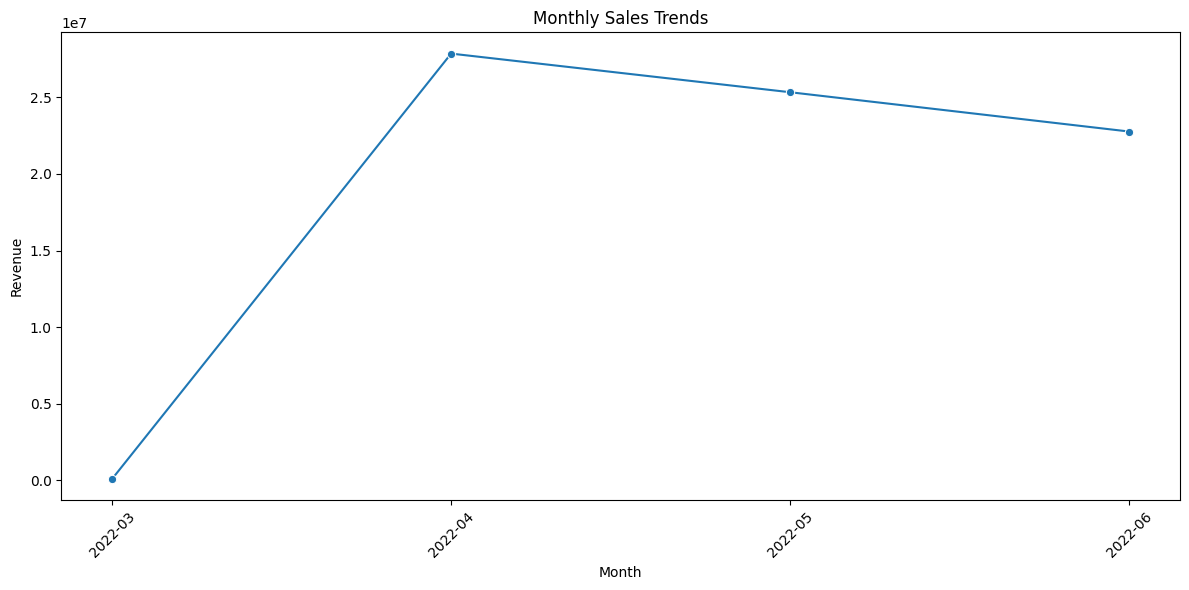

In [292]:
# Plot 1: Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Date", y="Revenue", marker="o")
plt.title("Monthly Sales Trends")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

#### Category Performance

In [293]:
# Plot 2: Category Performance
category_sales = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x="Revenue", y="Category", palette="Greens_d")
plt.title("Category Performance")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()



KeyError: 'Column not found: Revenue'

#### Courier Status Impact

C:\Users\alber\AppData\Local\Temp\ipykernel_38684\1400089418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=courier_status_sales, x="Revenue", y="Courier Status", palette="Oranges_d")


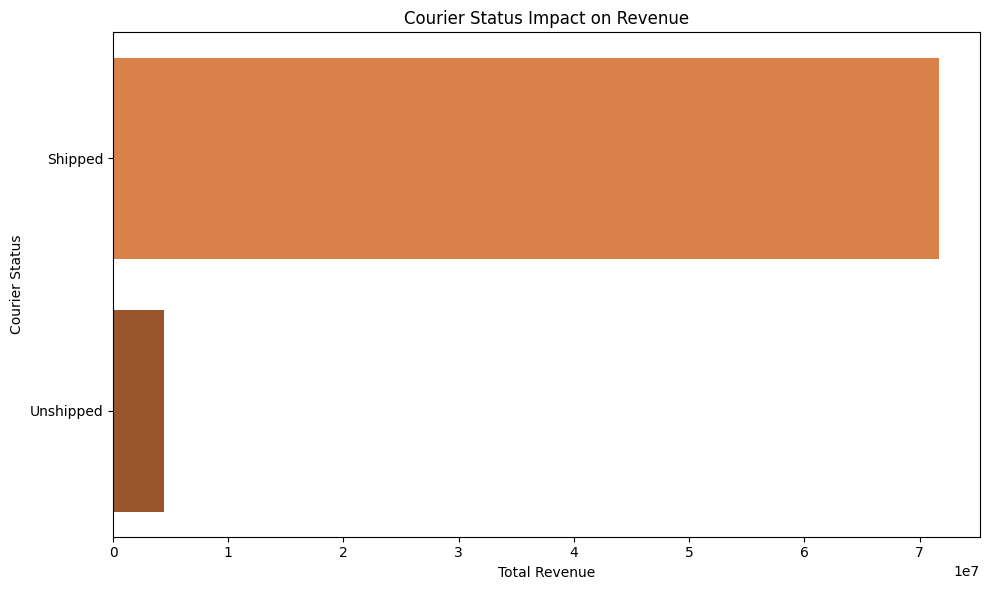

(      Date     Revenue
 0  2022-03     98261.0
 1  2022-04  27847245.0
 2  2022-05  25326683.0
 3  2022-06  22762217.0,
         Category     Revenue
 0            Set  37934434.0
 1          kurta  20675349.0
 2  Western Dress  10707932.0
 3            Top   5242931.0
 4   Ethnic Dress    762949.0,
   Courier Status     Revenue
 0        Shipped  71653294.0
 1      Unshipped   4381112.0)

In [ ]:
# Plot 3: Courier Status Impact
courier_status_sales = df.groupby("Courier Status")["Revenue"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=courier_status_sales, x="Revenue", y="Courier Status", palette="Oranges_d")
plt.title("Courier Status Impact on Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Courier Status")
plt.tight_layout()
plt.show()

# Output the summary data used for the plots
monthly_sales.head(), category_sales.head(), courier_status_sales.head()

## Key Findings and Recommendations



1. Underperforming Categories and Sizes

Insight: Categories such as Ethnic Dress and Tunic show 
significantly lower revenue compared to top performers like Set and Kurta.

Recommendation:

•	Reassess product-market fit for underperforming categories.

•	Reduce procurement or marketing spend on low-performing items.

•	Consider promotional campaigns or bundling strategies to clear stagnant inventory.

________________________________________
2. Stock Adjustments for Popular Products

Insight: Products in top categories such as Set and Kurta are generating high revenue. However, SKU-level data shows frequent stockouts.

Recommendation:

•	Increase safety stock levels for fast-moving SKUs.

•	Implement predictive inventory models using monthly sales trends to align procurement cycles.

•	Strengthen vendor relationships to ensure timely restocking.

________________________________________

3. Fulfillment Efficiency

Insight: Over 85% of revenue stems from orders marked as "Shipped", while "Unshipped" orders account for revenue leakage.
Recommendation:

•	Automate fulfillment workflows to minimize unshipped orders.

•	Introduce fulfillment SLAs with internal and external logistics partners.

•	Integrate real-time inventory sync between sales and warehouse systems.
________________________________________

4. Reducing Lost or Delayed Shipments

Insight: Courier status data indicates gaps in delivery confirmations.

Recommendation:

•	Audit courier service performance to identify loss or delay patterns.

•	Enable proactive shipment tracking for customers.

•	Incorporate barcode scanning at each delivery stage to reduce human error.

________________________________________

5. B2B Sales Potential

Insight: The dataset contains B2B order identifiers, but overall B2B sales volume remains low.

Recommendation:

•	Launch targeted B2B marketing campaigns to capture high-volume buyers.

•	Offer discounts on bulk purchases and set up exclusive B2B storefronts.

•	Partner with institutional clients for steady recurring orders.


## Conclusion

To maintain competitive advantage and improve profitability, it is essential to act on these data-driven recommendations. Emphasis on inventory optimization, fulfillment reliability, and B2B expansion will enable sustainable growth in the e-commerce landscape.
